# exo cadre

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.23.2'

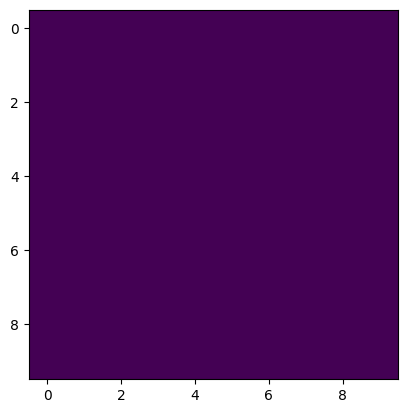

In [2]:
square = np.ones(shape=(10,10),dtype=bool)
result = plt.imshow(square)

In [3]:
def cadre(tab,*,inplace=True): # cf corrigé
    n,p = np.shape(tab)
    if not inplace:
        new_tab = np.copy(tab)
    else:
        new_tab = tab
    
    new_tab[1,:] = np.zeros(shape=(1,p))
    new_tab[n-2,:] = np.zeros(shape=(1,p))
    new_tab[:,1] = np.zeros(shape=(1,n))
    new_tab[:,p-2] = np.zeros(shape=(1,n))
    
    if not inplace:
        return new_tab

# tests de cadre
- sur `square`, on vérifie si le résultat est correct et si le paramètre `inplace` fonctionne
- sur `random`, on vérifie de plus que le format rectangulaire est accepté

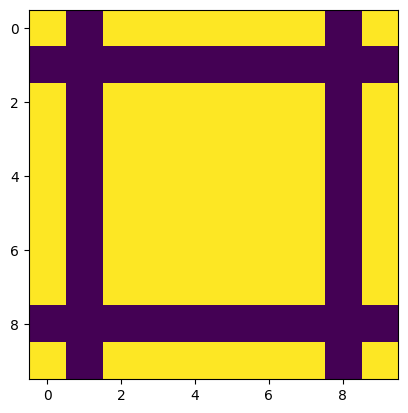

In [4]:
new_square = cadre(square,inplace=False)
result = plt.imshow(new_square)

j'avoue ne pas trop comprendre le code couleur de `plt.imshow()`

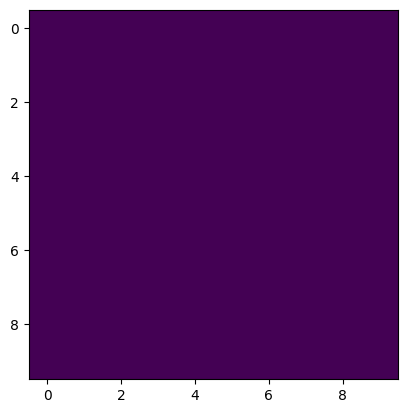

In [5]:
result = plt.imshow(square)

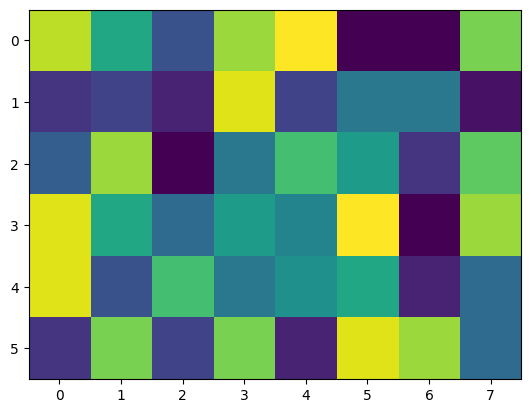

In [6]:
random = np.random.randint(0,21,(6,8),dtype=np.uint8)
result = plt.imshow(random)

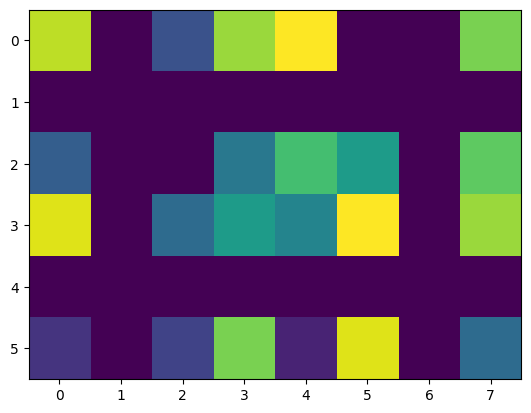

In [7]:
new_random = cadre(random,inplace=False)
result = plt.imshow(new_random)

# exo cadre2

In [8]:
def cadre2(tab):
    n,p = np.shape(tab)
    new_tab = np.resize(tab,(n+1,p+1))
    
    new_tab[0,:] = np.zeros(shape=(1,p+1))
    new_tab[n,:] = np.zeros(shape=(1,p+1))
    new_tab[:,0] = np.zeros(shape=(1,n+1))
    new_tab[:,p] = np.zeros(shape=(1,n+1))
    
    return new_tab
    

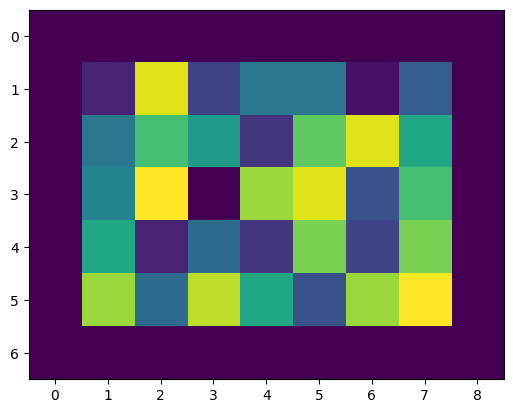

In [9]:
new_random2 = cadre2(random)
result = plt.imshow(new_random2)

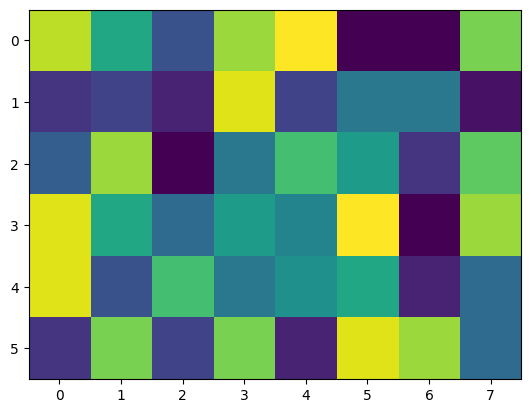

In [10]:
result = plt.imshow(random)

## modifier en place ?
Etant donné les outils qu'on a dans le cours : `np.resize` et `np.reshape`, je ne pense pas que `cadre2` puisse modifier un tableau en place. En effet, `np.resize` renvoie un nouveau tableau et `np.reshape` redimensionne le tableau sans changer son nombre d'éléments, or `cadre2` doit rajouter de nouvelles lignes et colonnes.

## tests possibles sur cadre2


# exo antidiagonal

## version avec un `for`, non vectorisée

In [11]:
def antidiag_for(l):
    n = len(l)
    square = np.zeros((n,n))
    for i in range(n):
        square[i,n-1-i] = l[i]
    return square
    

In [12]:
antidiag_for([1,2,3,4])

array([[0., 0., 0., 1.],
       [0., 0., 2., 0.],
       [0., 3., 0., 0.],
       [4., 0., 0., 0.]])

In [13]:
antidiag_for([0])

array([[0.]])

In [14]:
antidiag_for([0,1])

array([[0., 0.],
       [1., 0.]])

## version avec `for`, vectorisée

In [15]:
ind = np.indices((6,8))

In [16]:
ind

array([[[0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5]],

       [[0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7]]])

In [17]:
# création d'un tableau de coordonnées des cases

def tab_ind(n:int):
    res = np.empty((n,n),dtype=tuple)
    for i in range(n):
        for j in range(n):
            res[i,j] = (i,j)
    return res

In [18]:
obj = tab_ind(10)

In [19]:
obj[5,7]

(5, 7)

In [20]:
i,j = (5,7)
print(i,j)

5 7


In [21]:
# on utilise un for uniquement dans tab_ind

def antidiag(l):
    n = len(l)
    res = np.zeros((n,n))
    ind = tab_ind(n)
    
    # fonction à vectoriser
    def fill_tab(elt:tuple) -> None:
        """s'applique au tableau d'indices ind, remplit le tableau res"""
        i,j = elt
        if i + j == n-1:
            res[i,n-1-i] = l[i]
    
    fill_tab_vect = np.vectorize(fill_tab)
    fill_tab_vect(ind)
    
    return res
    

In [22]:
antidiag(range(10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 0., 6., 0., 0., 0., 0., 0., 0.],
       [0., 0., 7., 0., 0., 0., 0., 0., 0., 0.],
       [0., 8., 0., 0., 0., 0., 0., 0., 0., 0.],
       [9., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## version sans `for`, vectorisée
on souhaite écrire `tab_ind` sans `for`

In [23]:
x = range(10)
y = range(9,-1,-1)
res = list(zip(x,y))

In [24]:
res

[(0, 9),
 (1, 8),
 (2, 7),
 (3, 6),
 (4, 5),
 (5, 4),
 (6, 3),
 (7, 2),
 (8, 1),
 (9, 0)]

In [25]:
grid = np.indices((6,8))
grid[1]

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7]])

j'ai pensé à utiliser la fonction zip mais je n'y arrive pas sans `for`

## version sans for avec slicing et np.zeros

In [26]:
def antidiag_sl(l):
    n = len(l)
    res = np.zeros((n,n))
    res[range(n), range(n-1,-1,-1)] = np.copy(l)
    return res

antidiag_sl([1.5,6.4,9.2])

array([[0. , 0. , 1.5],
       [0. , 6.4, 0. ],
       [9.2, 0. , 0. ]])

# version avec np.empty

In [27]:
def antidiag_sl_empty(l):
    n = len(l)
    res = np.empty((n,n),dtype='float16')
    res[range(n), range(n-1,-1,-1)] = np.copy(l) #on utilise copy car l est de dimension 1
    return res

antidiag_sl_empty([1.5,6.4,9.2])

array([[3.433e-05, 7.349e-02, 1.500e+00],
       [0.000e+00, 6.398e+00, 0.000e+00],
       [9.203e+00, 0.000e+00, 1.192e-07]], dtype=float16)

In [28]:
def antidiag_sl_empty(l):
    n = len(l)
    res = np.empty((n,n),dtype='float32')
    res[range(n), range(n-1,-1,-1)] = np.copy(l) #on utilise copy car l est de dimension 1
    return res

antidiag_sl_empty([1.5,6.4,9.2])

array([[0.000000e+00, 1.401298e-45, 1.500000e+00],
       [7.806146e-39, 6.400000e+00, 0.000000e+00],
       [9.200000e+00, 0.000000e+00, 1.510600e-42]], dtype=float32)

In [29]:
def antidiag_sl_empty(l):
    n = len(l)
    res = np.empty((n,n),dtype='float64')
    res[range(n), range(n-1,-1,-1)] = np.copy(l) #on utilise copy car l est de dimension 1
    return res

antidiag_sl_empty([1.5,6.4,9.2])

array([[0. , 0. , 1.5],
       [0. , 6.4, 0. ],
       [9.2, 0. , 0. ]])

je m'attendais à avoir des flottants de très petites valeurs à la place des 0.

## dtype en paramètre

In [30]:
def antidiag_dtype(l,t):
    """t est la valeur de dtype"""
    n = len(l)
    res = np.empty((n,n),dtype=t)
    res[range(n), range(n-1,-1,-1)] = np.copy(l)
    return res

antidiag_dtype([1.5,6.4,9.2],"float32")

array([[0.000000e+00, 1.401298e-45, 1.500000e+00],
       [7.806146e-39, 6.400000e+00, 0.000000e+00],
       [9.200000e+00, 0.000000e+00, 1.510600e-42]], dtype=float32)

In [31]:
antidiag_dtype([1.5,6.4,9.2],"float64")

array([[0. , 0. , 1.5],
       [0. , 6.4, 0. ],
       [9.2, 0. , 0. ]])

In [32]:
antidiag_dtype([1.5,6.4,9.2],"int32")

array([[      0,       1,       1],
       [5570652,       6,       0],
       [      9,       0,    1078]])

In [33]:
antidiag_dtype([1.5,6.4,9.2],"int64")

array([[0, 0, 1],
       [0, 6, 0],
       [9, 0, 0]], dtype=int64)

## autres itérables en entrée

In [34]:
antidiag_sl((2,5))

array([[0., 2.],
       [5., 0.]])

In [35]:
antidiag_sl({4,8,9})

TypeError: float() argument must be a string or a number, not 'set'

les éléments d'un ensemble ne sont pas indexés

In [ ]:
antidiag_sl({"oui":10,"non":100})

In [ ]:
type({"oui":10,"non":100})

## test des "bouts de code"

In [ ]:
antidiag_sl(x**2 for x in range(4))

In [ ]:
antidiag_sl([x**2 for x in range(4)])

In [ ]:
type(x**2 for x in range(4))

In [ ]:
gen = (x**2 for x in range(4))

len(gen)

In [ ]:
new_gen = np.copy(gen)
new_gen